In [1]:
# Importing Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset.
df = pd.read_csv('messages.csv')
df

subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  
0     content - length : 3386 apple-iss research cen...      0  
1     lang classification grimes , joseph e . and ba...      0  
2     i am posting this inquiry for sergei atamas ( ...      0  
3     a colleague and i are researching the differin...      0  
4     earlier this morning i was on the phone with a...      0  
...                                                 ...    ...  
2888  hello thanks for stopping by ! ! we have taken...      1  
2889  the list owner of : " kiddin " has invited you...      1  
2890  judging from the return post , i must have sou...      0  
2891  gotcha ! there are two separate fallacies in t...      0  
2892  hello ! i ' m working on a thesis concerning a...      0  

[2893 rows x 3 columns]

In [3]:
# Head of the data.
df.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [4]:
# Checking columns 
df.columns

Index(['subject', 'message', 'label'], dtype='object')

In [5]:
# Checking Information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [6]:
# Checking datatypes.
df.dtypes

subject    object
message    object
label       int64
dtype: object

In [7]:
# Checking shape of the data.
print ('Shape = >',df.shape)

Shape = > (2893, 3)


In [8]:
# Value count for ham and spam.
print ('ham and spam counts','\n',df.label.value_counts())

ham and spam counts 
 0    2412
1     481
Name: label, dtype: int64


In [9]:
# Dropping subject to remove null values.
df.drop(columns = ['subject'],axis = 1,inplace = True)

In [10]:
# New column for the length of message.
df['length_1'] = df.message.str.len()
df.head(5)

message  label  length_1
0  content - length : 3386 apple-iss research cen...      0      2856
1  lang classification grimes , joseph e . and ba...      0      1800
2  i am posting this inquiry for sergei atamas ( ...      0      1435
3  a colleague and i are researching the differin...      0       324
4  earlier this morning i was on the phone with a...      0      1046

In [11]:
# Convert all messages to lower case.
df['message'] = df['message'].str.lower()

In [12]:
df.head()

message  label  length_1
0  content - length : 3386 apple-iss research cen...      0      2856
1  lang classification grimes , joseph e . and ba...      0      1800
2  i am posting this inquiry for sergei atamas ( ...      0      1435
3  a colleague and i are researching the differin...      0       324
4  earlier this morning i was on the phone with a...      0      1046

In [13]:
# Finding null values and there is no null values after dropping subject column.
df.isnull().sum()

message     0
label       0
length_1    0
dtype: int64

In [14]:
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [15]:
# Removing punctuation.
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

In [16]:
# Checking head data.
df.head()

message  label  length_1
0  content length numbr apple iss research center...      0      2856
1  lang classification grimes joseph e and barbar...      0      1800
2  i am posting this inquiry for sergei atamas sa...      0      1435
3  a colleague and i are researching the differin...      0       324
4  earlier this morning i was on the phone with a...      0      1046

In [17]:
# Remove stopwords to understand the model.
import string
import nltk
from nltk.corpus import stopwords

Stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['message'] = df['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in Stop_words))

In [18]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.message.str.len()
df.head()

message  label  length_1  \
0  content length numbr apple iss research center...      0      2856   
1  lang classification grimes joseph e barbara f ...      0      1800   
2  posting inquiry sergei atamas satamas umabnet ...      0      1435   
3  colleague researching differing degrees risk p...      0       324   
4  earlier morning phone friend mine living south...      0      1046   

   clean_length  
0          2179  
1          1454  
2          1064  
3           210  
4           629

In [19]:
# Total length removal.
print ('Original Length', df.length_1.sum())
print ('Cleaned Length', df.clean_length.sum())

Original Length 9344743
Cleaned Length 6767857


C:\Users\HOMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HOMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


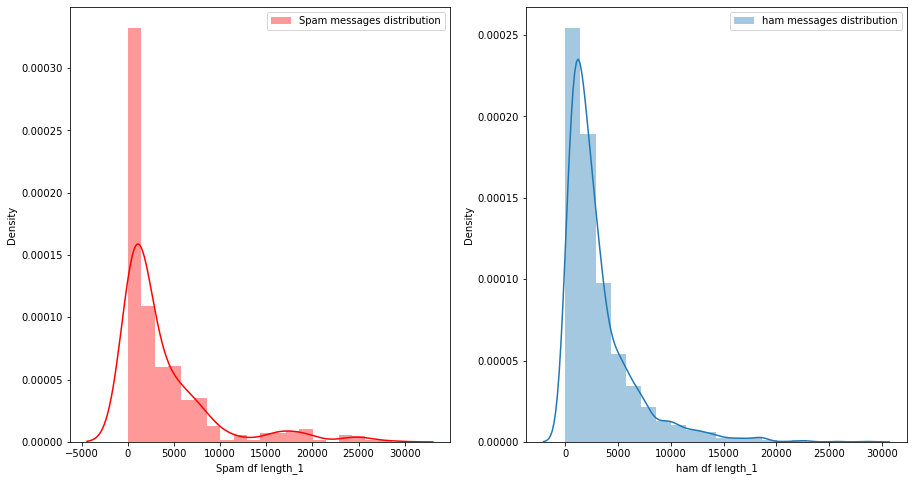

In [20]:
# Message distribution before cleaning.
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['length_1'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam df length_1')
ax[0].legend()

sns.distplot(df[df['label']==0]['length_1'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham df length_1')
ax[1].legend()

plt.show()

C:\Users\HOMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HOMA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


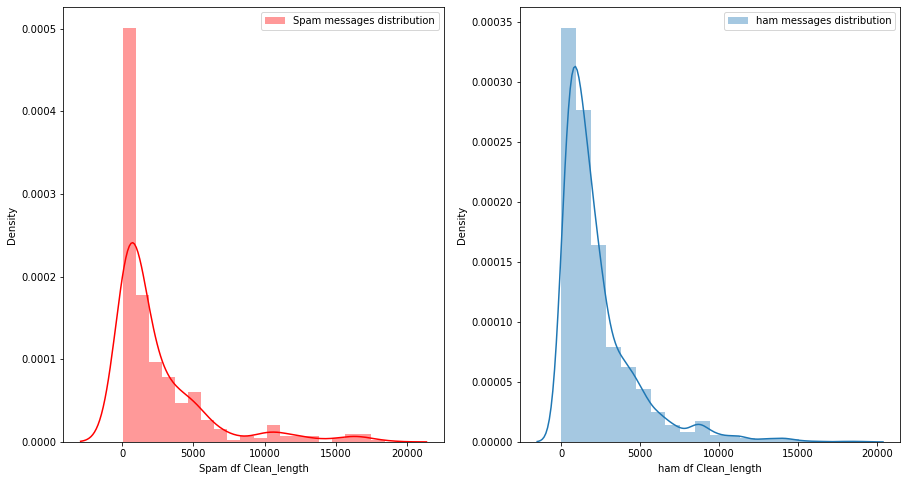

In [21]:
# Message distribution after cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam df Clean_length')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham df Clean_length')
ax[1].legend()

plt.show()

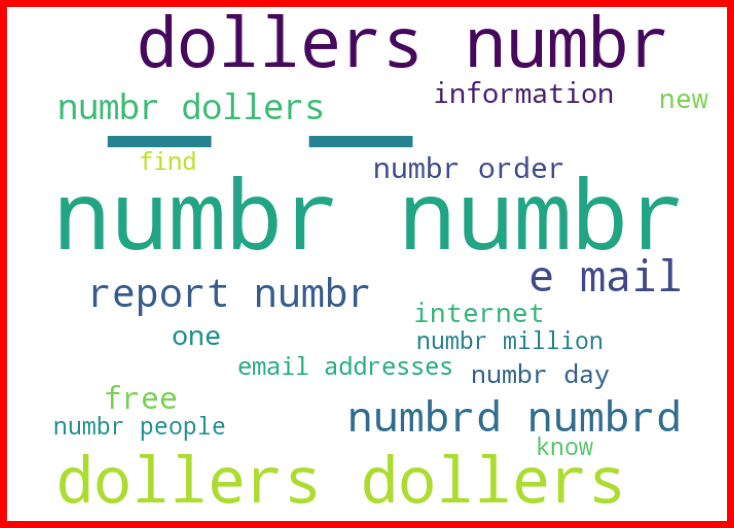

In [22]:
# Getting sense of loud words in spam 
from wordcloud import WordCloud

spams = df['message'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

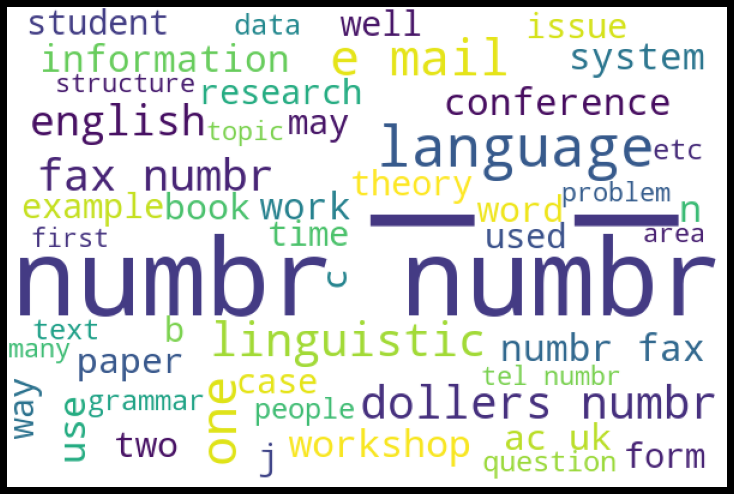

In [23]:
# Getting sense of loud words in ham 

hams = df['message'][df['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [24]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(df['message'])

X = features
y = df['label']

In [25]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8342541436464088


In [26]:
# Checking y _pred.
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
# Checking classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       585
           1       1.00      0.14      0.24       139

    accuracy                           0.83       724
   macro avg       0.91      0.57      0.57       724
weighted avg       0.86      0.83      0.78       724



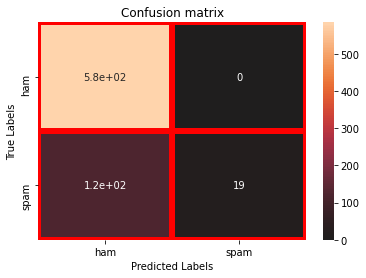

In [28]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [29]:
# Checking confusion matrix.
conf_mat

array([[585,   0],
       [120,  19]], dtype=int64)

Now we are using remaining algoirthms also to check the prediction and metrics.

In [30]:
# Importing all alogorithms to make a model.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import auc,roc_curve
models=[LogisticRegression(),DecisionTreeClassifier(),SVC()]

In [31]:
# Defining and predicting the model.
def model_perf(model):
    f,ax=plt.subplots(1,2,figsize=(14,5))
    model.fit(X_train,Y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print(sns.heatmap(confusion_matrix(y_test,y_pred,labels=[1,0]),annot=True,ax=ax[0]))
    fpr,tpr,thresh=roc_curve(y_test,y_pred)
    roc_auc=auc(fpr,tpr)
    print('AUC_ROC score',roc_auc)
    ax[1].plot(fpr,tpr)
    ax[1].set_title('ROC_AUC curve')
    ax[1].set_xlabel('False positive rate')
    ax[1].set_ylabel('True positive rate')

**** LogisticRegression() ****
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       585
           1       0.99      0.73      0.84       139

    accuracy                           0.95       724
   macro avg       0.97      0.87      0.91       724
weighted avg       0.95      0.95      0.94       724

AxesSubplot(0.125,0.125;0.281818x0.755)
AUC_ROC score 0.866051773965443
**** DecisionTreeClassifier() ****
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       585
           1       0.93      0.83      0.88       139

    accuracy                           0.96       724
   macro avg       0.95      0.91      0.93       724
weighted avg       0.96      0.96      0.95       724

AxesSubplot(0.125,0.125;0.281818x0.755)
AUC_ROC score 0.9068314579105946
**** SVC() ****
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       585
          

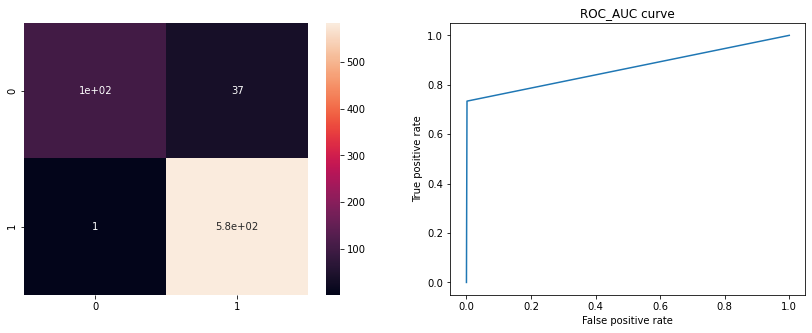

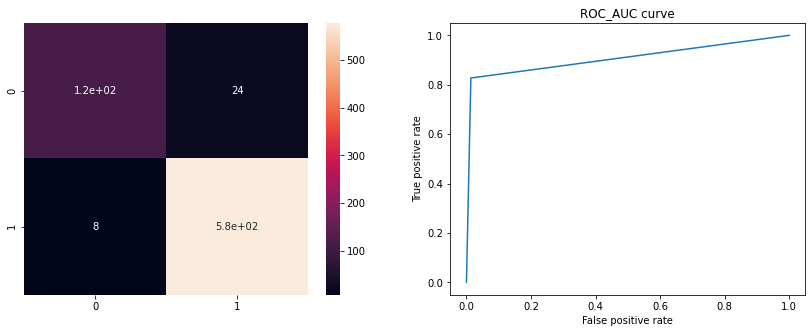

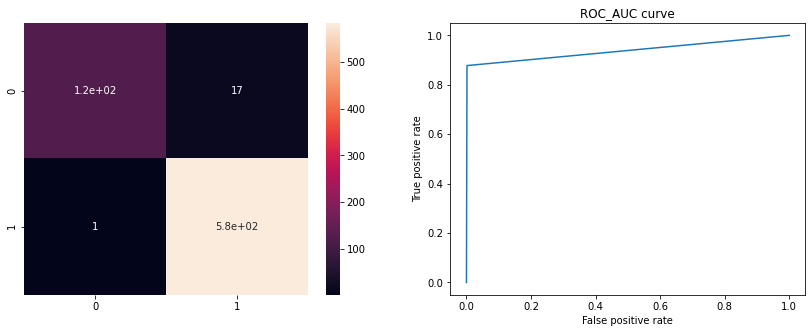

In [32]:
# Finding model with all algorithms.
for i in models:
    print('****',i,'****')
    model_perf(i)

In [37]:
# Using Grid search CV.
from sklearn.model_selection import GridSearchCV
def grid_search(x,y,model,para_dict):
    grid = GridSearchCV(estimator=model,param_grid=para_dict,cv=5,scoring='f1')
    grid.fit(X,y)
    print('Best parameter',grid.best_params_)

In [38]:
grid_search(X,y,SVC(),{'kernel':['linear','poly','rbf']})

Best parameter {'kernel': 'linear'}


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       585
           1       0.99      0.94      0.97       139

    accuracy                           0.99       724
   macro avg       0.99      0.97      0.98       724
weighted avg       0.99      0.99      0.99       724

AxesSubplot(0.125,0.125;0.281818x0.755)
AUC_ROC score 0.9703683207280329


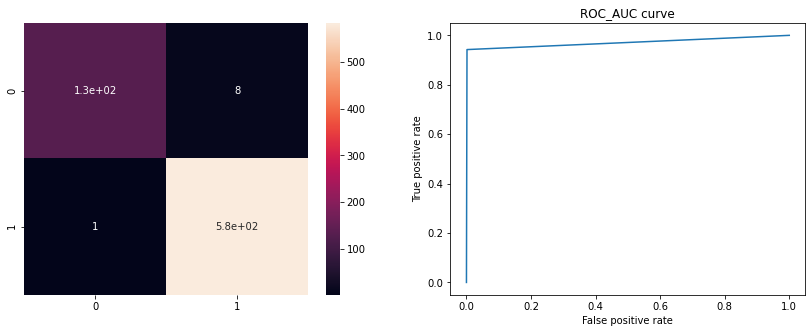

In [39]:
model_perf(SVC(kernel='linear'))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       585
           1       0.99      0.94      0.97       139

    accuracy                           0.99       724
   macro avg       0.99      0.97      0.98       724
weighted avg       0.99      0.99      0.99       724

AxesSubplot(0.125,0.125;0.62x0.755)


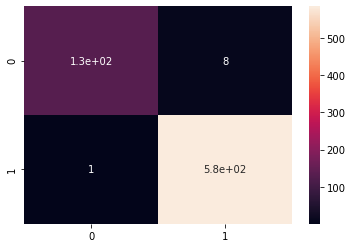

In [40]:
# Finding classification report and confusion matrix for SVC alogorithm.
model = SVC(kernel='linear')
model.fit(X_train,Y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print(sns.heatmap(confusion_matrix(y_test,y_pred,labels=[1,0]),annot=True))

In [41]:
# Using Cross- validation.
from sklearn.model_selection import cross_val_score
score = cross_val_score(SVC(kernel='linear'),X,y,cv=5,scoring='f1')
print(score,score.mean())

[0.96808511 0.95698925 0.96842105 0.96774194 0.96216216] 0.9646799007944837


In [42]:
# Saving the model.
import joblib
joblib.dump(model,'Email SPAM predictor.obj')

['Email SPAM predictor.obj']

In [43]:
# Saving the model in csv.
joblib.dump(model,'Email SPAM predictor.csv')

['Email SPAM predictor.csv']

Thank You...!!